# Svm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/modos/ML-AI/refs/heads/main/datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


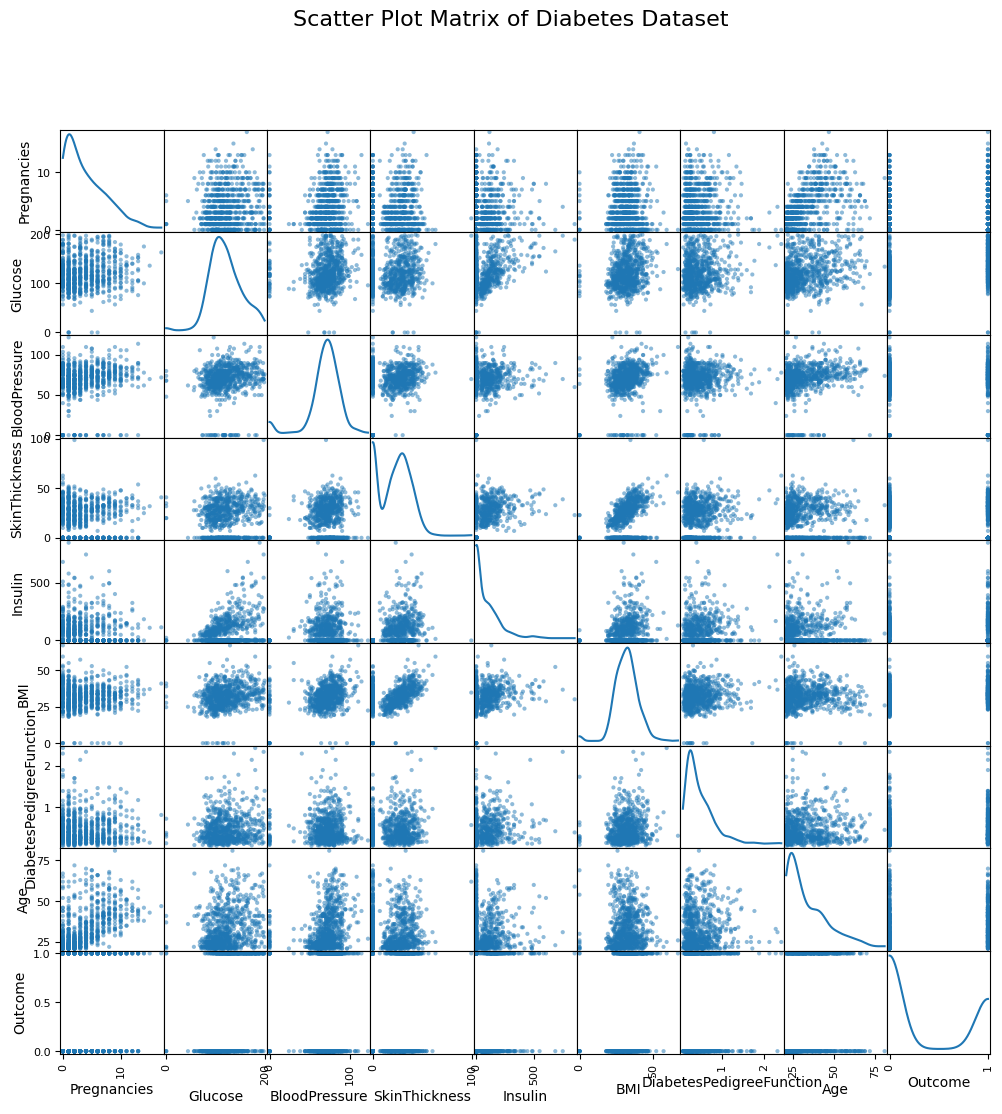

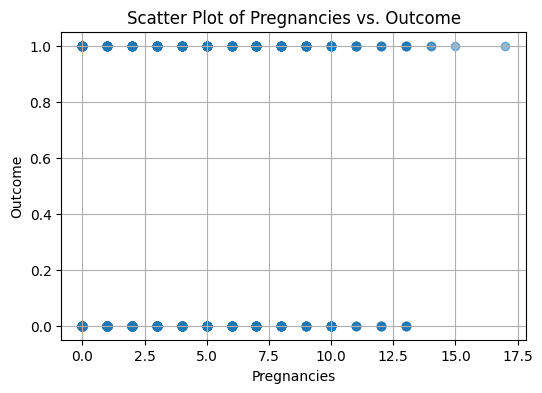

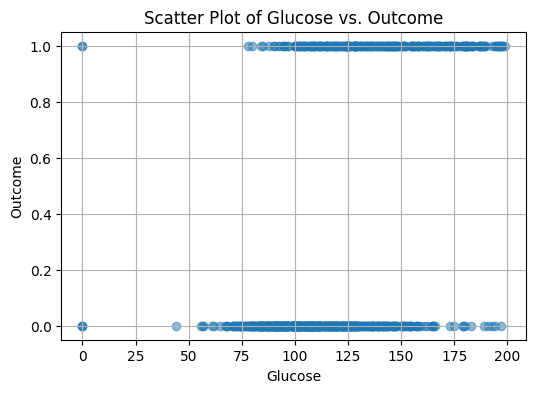

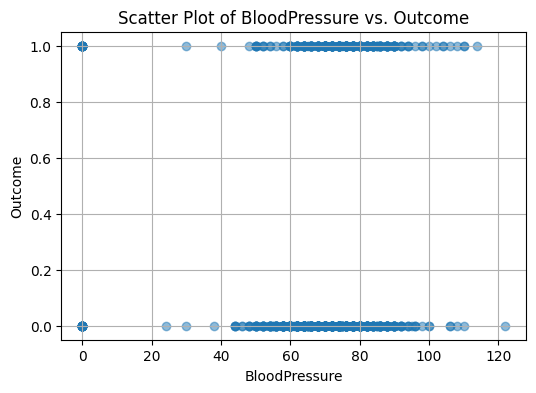

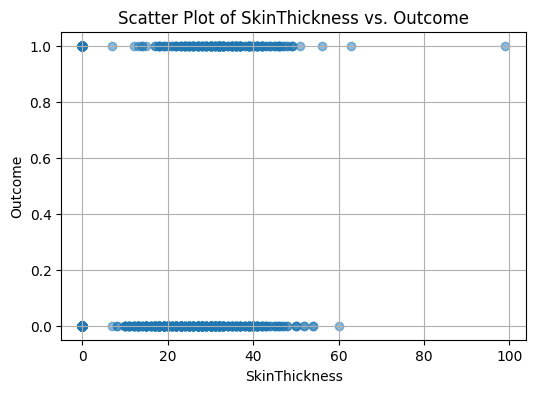

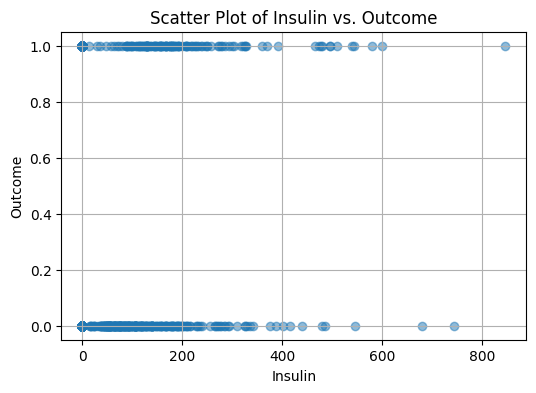

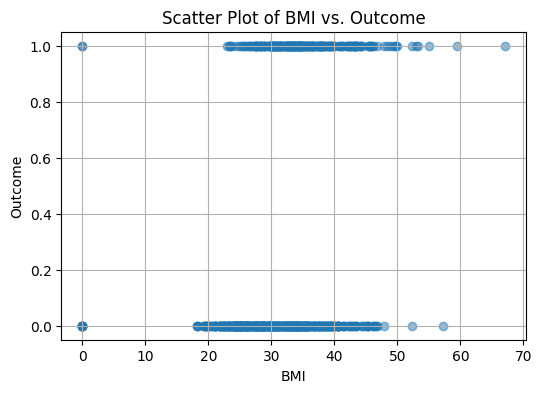

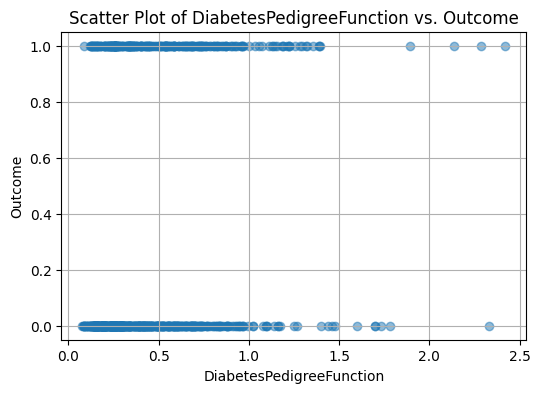

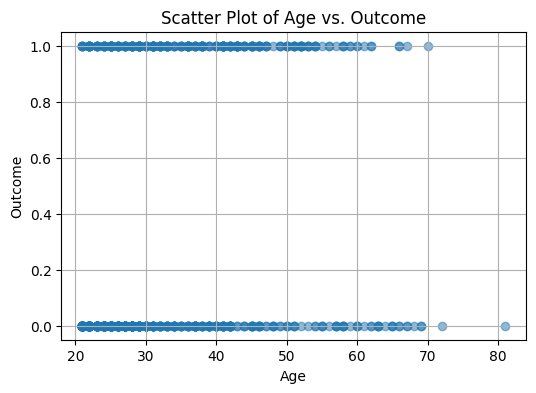

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Plot Matrix of Diabetes Dataset', fontsize=16)
plt.show()

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data['Outcome'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.title(f'Scatter Plot of {feature} vs. Outcome')
    plt.grid(True)
    plt.show()

In [ ]:
features_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [ ]:
z = np.abs(stats.zscore(data[features_to_scale]))
threshold = 3
data_no_outliers = data[(z < threshold).all(axis=1)]

In [ ]:
data_no_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.000261,-0.018807,0.167525,0.015766,-0.063318,0.027488,-0.052312,-0.012458,0.329942
std,0.973829,0.939096,0.636547,0.966350,0.782389,0.840065,0.859306,0.973148,0.470534
min,-1.141852,-2.406579,-2.331851,-1.288212,-0.692891,-1.750544,-1.189553,-1.041549,0.000000
25%,-0.844885,-0.685236,-0.263941,-1.288212,-0.692891,-0.582887,-0.685193,-0.786286,0.000000
50%,-0.250952,-0.184482,0.149641,0.154533,-0.315185,0.000942,-0.307679,-0.360847,0.000000
75%,0.639947,0.566649,0.563223,0.719086,0.401154,0.546695,0.403559,0.575118,1.000000
max,2.718712,2.444478,2.734528,2.475471,2.910511,2.920085,2.987271,2.957575,1.000000


In [ ]:
X = data_no_outliers.drop('Outcome', axis=1)
y = data_no_outliers['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

grid = GridSearchCV(SVC(max_iter=1000), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=0.755 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=0.718 total time=   0.1s
[CV 5/5] END C=0.1, degree=2, gamma=0.1, kernel=linear;, score=0.836 total time=   0.1s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.1s
[CV 2/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.1s
[CV 3/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=poly;, score=0.682 total 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.727 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.682 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=10, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=10, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=10, kernel=linear;, score=0.755 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=10, kernel=linear;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=10, kernel=rbf;, score=0.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 2/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.673 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.709 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=0.1, kernel=poly;, score=0.718 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=1, kernel=linear;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider


[CV 4/5] END C=0.1, degree=3, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=10, kernel=linear;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=10, kernel=rbf;, score=0.691 total time=   0.0s
[CV 1/5] END C=0.1, degree=3, gamma=10, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END C=0.1, degree=3, gamma=10, kernel=poly;, score=0.436 total time=   0.0s
[CV 3/5] END C=0.1, degree=3, gamma=10, kernel=poly;, score=0.527 total time=   0.0s
[CV 4/5] END C=0.1, degree=3, gamma=10, kernel=poly;, score=0.509 total time=   0.0s
[CV 5/5] END C=0.1, degree=3, gamma=10, kernel=poly;, score=0.473

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 5/5] END C=0.1, degree=4, gamma=0.1, kernel=linear;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.682 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.691 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.682 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.664 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=0.1, kernel=poly;, score=0.691 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=1, kernel=linear;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 4/5] END C=0.1, degree=4, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=10, kernel=linear;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.1, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=10, kernel=rbf;, score=0.691 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 1/5] END C=0.1, degree=4, gamma=10, kernel=poly;, score=0.636 total time=   0.0s
[CV 2/5] END C=0.1, degree=4, gamma=10, kernel=poly;, score=0.373 total time=   0.0s
[CV 3/5] END C=0.1, degree=4, gamma=10, kernel=poly;, score=0.400 total time=   0.0s
[CV 4/5] END C=0.1, degree=4, gamma=10, kernel=poly;, score=0.455 total time=   0.0s
[CV 5/5] END C=0.1, degree=4, gamma=10, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=linear;, score=0.718 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.709 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.664 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.709 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.700 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.1, kernel=poly;, score=0.709 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=1, kernel=linear;, score=0.809 total time=   

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 2/5] END C=1, degree=2, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.655 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.673 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 4/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.536 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=10, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=10, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=10, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=10, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=10, kernel=rbf;, score=0.691 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=10, kernel=poly;, score=0.373 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=10, kernel=poly;, score=0.382 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 3/5] END C=1, degree=2, gamma=10, kernel=poly;, score=0.427 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=10, kernel=poly;, score=0.391 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=10, kernel=poly;, score=0.464 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.764 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.700 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.755 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.709 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=0.1, kernel=poly;, score=0.773 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=1, kernel=linear;, score=0.800 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 3/5] END C=1, degree=3, gamma=1, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=1, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=1, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=1, kernel=poly;, score=0.536 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=1, kernel=poly;, score=0.545 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=1, kernel=poly;, score=0.445 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=1, kernel=poly;, score=0.518 total time=   0.0s
[CV 5/5] END C=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 1/5] END C=1, degree=3, gamma=10, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=10, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=10, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=10, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=10, kernel=rbf;, score=0.691 total time=   0.0s
[CV 1/5] END C=1, degree=3, gamma=10, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END C=1, degree=3, gamma=10, kernel=poly;, score=0.436 total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 3/5] END C=1, degree=3, gamma=10, kernel=poly;, score=0.527 total time=   0.0s
[CV 4/5] END C=1, degree=3, gamma=10, kernel=poly;, score=0.509 total time=   0.0s
[CV 5/5] END C=1, degree=3, gamma=10, kernel=poly;, score=0.473 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=0.1, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.1, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=0.1, kernel=rbf;, score=0.718 total ti

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 1/5] END C=1, degree=4, gamma=1, kernel=poly;, score=0.564 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=1, kernel=poly;, score=0.382 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=1, kernel=poly;, score=0.527 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=1, kernel=poly;, score=0.545 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=1, kernel=poly;, score=0.491 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=10, kernel=linear;, score=0.809 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=10, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=10, kernel=linear;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=10, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 4/5] END C=1, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=10, kernel=rbf;, score=0.691 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=10, kernel=poly;, score=0.636 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=10, kernel=poly;, score=0.373 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=10, kernel=poly;, score=0.400 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=10, kernel=poly;, score=0.455 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=10, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.1, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.1, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.1, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.1, kernel=linear;, score=0.827 total

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 2/5] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.691 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.727 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.682 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.682 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=1, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=1, kernel=linear;, score=0.664 tot

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 4/5] END C=10, degree=2, gamma=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=1, kernel=poly;, score=0.445 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=1, kernel=poly;, score=0.373 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=1, kernel=poly;, score=0.336 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=1, kernel=poly;, score=0.536 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 5/5] END C=10, degree=2, gamma=1, kernel=poly;, score=0.373 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=10, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=10, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=10, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=10, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=10, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=10, kernel=rbf;, score=0.691 total time=   0.0s
[CV 1/5] END C=10, degree=2, gamma=10, kernel=poly;, score=0.373 total t

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 2/5] END C=10, degree=2, gamma=10, kernel=poly;, score=0.382 total time=   0.0s
[CV 3/5] END C=10, degree=2, gamma=10, kernel=poly;, score=0.427 total time=   0.0s
[CV 4/5] END C=10, degree=2, gamma=10, kernel=poly;, score=0.391 total time=   0.0s
[CV 5/5] END C=10, degree=2, gamma=10, kernel=poly;, score=0.464 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 5/5] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.773 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.745 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.727 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.727 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.745 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.727 tot

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider


[CV 4/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.436 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.527 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.509 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=1, kernel=poly;, score=0.473 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=10, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=10, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=10, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=10, kernel=linear;, score=0.827 total tim

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 1/5] END C=10, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=10, kernel=rbf;, score=0.691 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=10, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=10, kernel=poly;, score=0.436 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=10, kernel=poly;, score=0.527 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=10, kernel=poly;, score=0.509 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=10, kernel=poly;, score=0.473 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.1, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.1, kernel=linear;, score=0.718 total time

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 3/5] END C=10, degree=4, gamma=0.1, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.1, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.745 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.745 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.736 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=0.1, kernel=poly;, score=0.70

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 2/5] END C=10, degree=4, gamma=1, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=1, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=1, kernel=poly;, score=0.591 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=1, kernel=poly;, score=0.382 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=1, kernel=poly;, score=0.409 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

[CV 4/5] END C=10, degree=4, gamma=1, kernel=poly;, score=0.455 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=1, kernel=poly;, score=0.491 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=10, kernel=linear;, score=0.791 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=10, kernel=linear;, score=0.718 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=10, kernel=linear;, score=0.664 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=10, kernel=linear;, score=0.709 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=10, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=10, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=10, kernel=rbf;, score=0.691 total ti

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.7854545454545454
SVC(C=0.1, degree=2, gamma=0.1, kernel='linear', max_iter=1000)


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7681159420289855


# Mnist Pytorch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


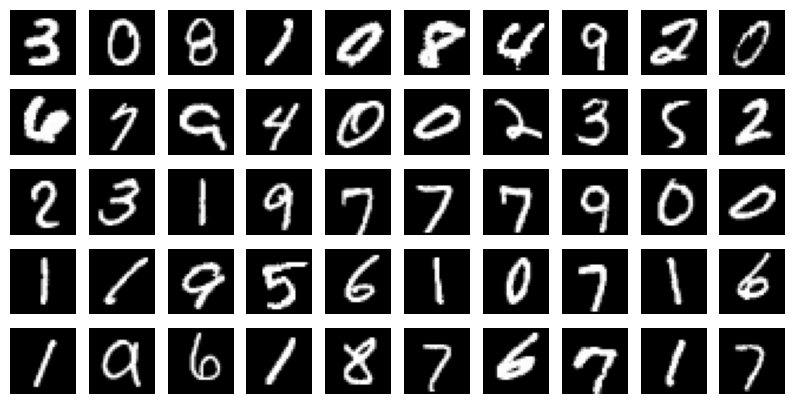

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

indices = np.random.choice(x_train.shape[0], 50, replace=False)
images = x_train[indices]

fig, axes = plt.subplots(5, 10, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

y_pred_train = model.predict(X_train).argmax(axis=1)
y_pred_val = model.predict(X_val).argmax(axis=1)
y_pred_test = model.predict(X_test).argmax(axis=1)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, f1

train_metrics = evaluate_model(y_train, y_pred_train)
val_metrics = evaluate_model(y_val, y_pred_val)
test_metrics = evaluate_model(y_test, y_pred_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.1740 - loss: 5.1529 - val_accuracy: 0.2349 - val_loss: 2.0088
Epoch 2/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2445 - loss: 1.9973 - val_accuracy: 0.2846 - val_loss: 2.2132
Epoch 3/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2608 - loss: 1.9952 - val_accuracy: 0.2924 - val_loss: 2.0640
Epoch 4/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2478 - loss: 2.0168 - val_accuracy: 0.2532 - val_loss: 1.9671
Epoch 5/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2651 - loss: 1.9100 - val_accuracy: 0.2861 - val_loss: 1.8725
Epoch 6/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2489 - loss: 1.9842 - val_accuracy: 0.2079 - val_loss: 2.0365
Epoch 7/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1993 - loss: 2.0694 - val_accuracy: 0.2108 - val_loss: 2.0326
Epoch 8/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2001 - loss: 2.0420 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


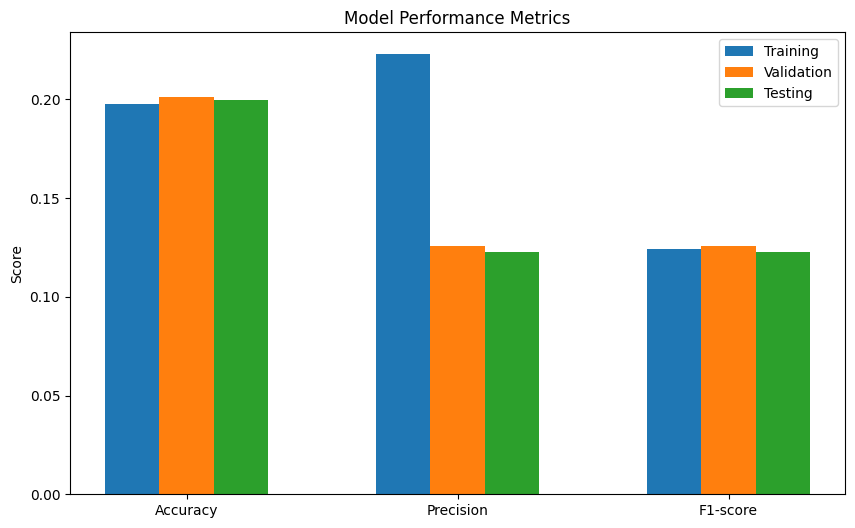

In [ ]:
def plot_metrics(train_metrics, val_metrics, test_metrics):
    metrics = ['Accuracy', 'Precision', 'F1-score']
    x = range(len(metrics))
    width = 0.2

    plt.figure(figsize=(10, 6))
    plt.bar(x, train_metrics, width, label='Training')
    plt.bar([i + width for i in x], val_metrics, width, label='Validation')
    plt.bar([i + 2 * width for i in x], test_metrics, width, label='Testing')
    plt.xticks([i + width for i in x], metrics)
    plt.ylabel("Score")
    plt.title("Model Performance Metrics")
    plt.legend()
    plt.show()


plot_metrics(train_metrics, val_metrics, test_metrics)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


638/638 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2009 - loss: 168.5462 - val_accuracy: 0.2160 - val_loss: 2.0494
Epoch 2/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2621 - loss: 2.5677 - val_accuracy: 0.3460 - val_loss: 1.7516
Epoch 3/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3430 - loss: 1.7476 - val_accuracy: 0.2492 - val_loss: 1.9572
Epoch 4/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2985 - loss: 1.8395 - val_accuracy: 0.3551 - val_loss: 1.6814
Epoch 5/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3698 - loss: 1.6715 - val_accuracy: 0.4490 - val_loss: 1.5437
Epoch 6/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4618 - loss: 1.4967 - val_accuracy: 0.4219 - val_loss: 1.6083
Epoch 7/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4124 - loss: 1.6130 - val_accuracy: 0.3372 - val_loss: 1.7480
Epoch 8/10
638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4015 - loss: 1.6188 - val_accuracy: 0.4871 - va

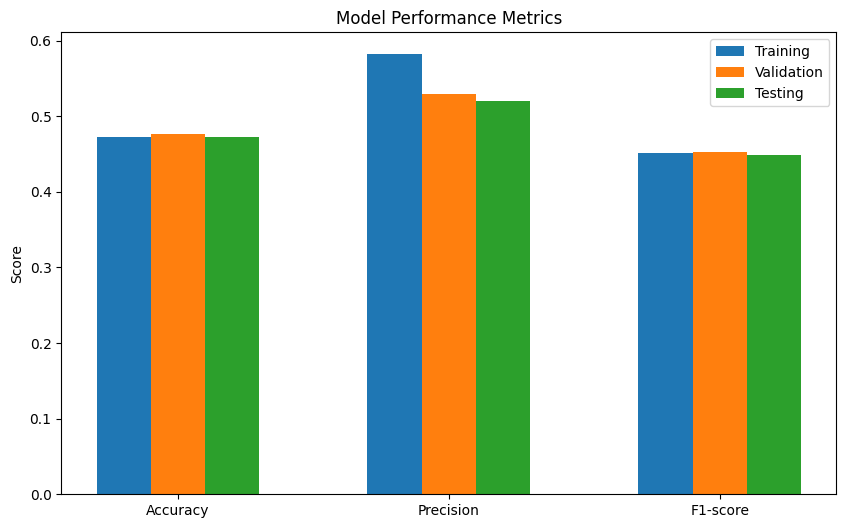

Train Accuracy: 0.47284313725490196, Precision: 0.5819707123950577, F1-score: 0.4518933110532574
Validation Accuracy: 0.4761111111111111, Precision: 0.5299992216041424, F1-score: 0.45293785677712395
Test Accuracy: 0.47291666666666665, Precision: 0.5197855552036714, F1-score: 0.4481724944500799


In [ ]:
model_128 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_128.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_128 = model_128.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

y_pred_train = model_128.predict(X_train).argmax(axis=1)
y_pred_val = model_128.predict(X_val).argmax(axis=1)
y_pred_test = model_128.predict(X_test).argmax(axis=1)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, f1

train_metrics = evaluate_model(y_train, y_pred_train)
val_metrics = evaluate_model(y_val, y_pred_val)
test_metrics = evaluate_model(y_test, y_pred_test)

plot_metrics(train_metrics, val_metrics, test_metrics)

print(f"Train Accuracy: {train_metrics[0]}, Precision: {train_metrics[1]}, F1-score: {train_metrics[2]}")
print(f"Validation Accuracy: {val_metrics[0]}, Precision: {val_metrics[1]}, F1-score: {val_metrics[2]}")
print(f"Test Accuracy: {test_metrics[0]}, Precision: {test_metrics[1]}, F1-score: {test_metrics[2]}")

# Mnist With Normalization

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.15)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6358 - loss: 1.3827 - val_accuracy: 0.8917 - val_loss: 0.4625
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8782 - loss: 0.4761 - val_accuracy: 0.9080 - val_loss: 0.3521
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8960 - loss: 0.3850 - val_accuracy: 0.9143 - val_loss: 0.3117
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.3513 - val_accuracy: 0.9202 - val_loss: 0.2894
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9118 - loss: 0.3162 - val_accuracy: 0.9259 - val_loss: 0.2723
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.3023 - val_accuracy: 0.9283 - val_loss: 0.2589
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9193 - loss: 0.2868 - val_accuracy: 0.9304 - val_loss: 0.2488
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2752 - val_accuracy: 0.

# Change Learning Rate

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=9e-1)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.15)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1024 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1003 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1012 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0986 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0995 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0998 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.0959 - val_loss: nan
Epoch 9/10
797/797 ━━━━━

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.15)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9803 - loss: 0.0626 - val_accuracy: 0.9660 - val_loss: 0.1311
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9797 - loss: 0.0622 - val_accuracy: 0.9659 - val_loss: 0.1310
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9798 - loss: 0.0634 - val_accuracy: 0.9659 - val_loss: 0.1309
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9803 - loss: 0.0615 - val_accuracy: 0.9659 - val_loss: 0.1309
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9804 - loss: 0.0627 - val_accuracy: 0.9660 - val_loss: 0.1308
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9808 - loss: 0.0609 - val_accuracy: 0.9660 - val_loss: 0.1308
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9804 - loss: 0.0598 - val_accuracy: 0.9659 - val_loss: 0.1307
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9805 - loss: 0.0642 - val_accuracy: 0.

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=9e-1)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.15)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8271 - loss: 0.9339 - val_accuracy: 0.9422 - val_loss: 0.2047
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9505 - loss: 0.1673 - val_accuracy: 0.9513 - val_loss: 0.1594
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9587 - loss: 0.1387 - val_accuracy: 0.9584 - val_loss: 0.1460
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1161 - val_accuracy: 0.9668 - val_loss: 0.1185
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9681 - loss: 0.1020 - val_accuracy: 0.9638 - val_loss: 0.1324
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9677 - loss: 0.1045 - val_accuracy: 0.9639 - val_loss: 0.1308
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0864 - val_accuracy: 0.9632 - val_loss: 0.1368
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9760 - loss: 0.0761 - val_accuracy: 0.

بیش‌برازش و کم‌برازش در شبکه‌های عصبی
بیش‌برازش (Overfitting):

تعریف: زمانی اتفاق می‌افتد که مدل شما به داده‌های آموزشی بسیار خوب عمل می‌کند اما در داده‌های جدید و دیده نشده عملکرد ضعیفی دارد. به عبارت دیگر، مدل شما به جای یادگیری الگوهای کلی، جزئیات و نویز داده‌های آموزشی را حفظ کرده است.

نشانه‌ها: دقت بالا در داده‌های آموزشی و دقت پایین در داده‌های آزمایشی (یا اعتبارسنجی).

راهکارها:

افزایش داده‌های آموزشی: با داشتن داده‌های آموزشی بیشتر، مدل می‌تواند الگوهای کلی را بهتر یاد بگیرد و کمتر به جزئیات وابسته باشد.
منظم‌سازی (Regularization): با اضافه کردن جریمه به تابع هزینه، مدل تشویق می‌شود تا وزن‌های کوچکتر داشته باشد که به جلوگیری از بیش‌برازش کمک می‌کند. دو روش رایج منظم‌سازی عبارتند از:
L1 Regularization: به تابع هزینه، مجموع قدر مطلق وزن‌ها اضافه می‌شود.
L2 Regularization: به تابع هزینه، مجموع مربع وزن‌ها اضافه می‌شود.
Dropout: در طول آموزش، به صورت تصادفی تعدادی از نورون‌ها را غیرفعال می‌کند. این کار به جلوگیری از وابستگی بیش از حد مدل به نورون‌های خاص و در نتیجه کاهش بیش‌برازش کمک می‌کند.
Early Stopping: آموزش مدل را قبل از اینکه به طور کامل همگرا شود، متوقف می‌کند. این کار زمانی انجام می‌شود که دقت در داده‌های اعتبارسنجی شروع به کاهش کند.
کم‌برازش (Underfitting):

تعریف: زمانی اتفاق می‌افتد که مدل شما به داده‌های آموزشی و همچنین داده‌های جدید به خوبی عمل نمی‌کند. به عبارت دیگر، مدل شما به اندازه کافی پیچیده نیست تا بتواند الگوهای داده‌ها را یاد بگیرد.

نشانه‌ها: دقت پایین در داده‌های آموزشی و داده‌های آزمایشی.

راهکارها:

افزایش پیچیدگی مدل: با اضافه کردن لایه‌ها یا نورون‌های بیشتر به مدل، می‌توان قدرت یادگیری آن را افزایش داد.
افزایش ویژگی‌ها: با استخراج ویژگی‌های بیشتر از داده‌ها، می‌توان اطلاعات بیشتری را در اختیار مدل قرار داد.
کاهش منظم‌سازی: اگر از منظم‌سازی استفاده می‌کنید، ممکن است لازم باشد مقدار آن را کاهش دهید تا مدل بتواند الگوهای پیچیده‌تر را یاد بگیرد.
افزایش زمان آموزش: ممکن است لازم باشد زمان آموزش را افزایش دهید تا مدل بتواند به طور کامل داده‌ها را یاد بگیرد.
تحلیل نتایج قسمت‌های قبل:
مدل SVM برای دیابت: با توجه به دقت بالا در داده‌های آموزشی و آزمایشی، به نظر می‌رسد که این مدل به خوبی آموزش دیده و دچار بیش‌برازش یا کم‌برازش نشده است.
مدل MNIST بدون نرمال‌سازی: با توجه به دقت نسبتاً پایین در داده‌های آموزشی و آزمایشی، ممکن است این مدل دچار کم‌برازش باشد. با اضافه کردن نرمال‌سازی و افزایش پیچیدگی مدل (افزایش تعداد نورون‌ها در لایه مخفی)، دقت مدل افزایش یافت.
مدل MNIST با نرمال‌سازی: با توجه به دقت بالا در داده‌های آموزشی و آزمایشی، به نظر می‌رسد که این مدل به خوبی آموزش دیده و دچار بیش‌برازش یا کم‌برازش نشده است. با این حال، با تغییر نرخ یادگیری به مقادیر بسیار کوچک یا منفی، دقت مدل کاهش یافت که نشان‌دهنده اهمیت انتخاب نرخ یادگیری مناسب است.